### Your details

Your Name: Bhagyalakshmy Saburaj

Your ID number: 25275224

General rules: 

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).


In [66]:
from typing import List, Tuple
from pandas import DataFrame, Series

# Task 1: Linear Algebra

## Custom Exception

Here we define the CustomException class, which is the one that you should use to raise exceptions in your functions when needed (an example is provided for the vector_sum function, the rest will need to be added by you). **Do not use any other type of exception.**

In [67]:
class CustomException(Exception):
    pass  # You don't need to add anything here.

## Code

Here we provide the template for the required functions. **Do not change the names of the functions as they will be used for automatic testing. Also do not define any other functions with the exact same name anywhere else throughout the notebook.** 

In [68]:
def scalar_mul(vec: List[float], scalar: float) -> List[float]:
    return [scalar * v for v in vec] ## Multiply a vector by a scalar

In [69]:
def vector_sum(vec_1: List[float], vec_2: List[float]) -> List[float]:
    
    if len(vec_1) != len(vec_2): ## Add two vectors of same length.
        raise CustomException("Vectors must be of the same length")
    return list(map(lambda a, b: a + b, vec_1, vec_2))

In [70]:
def vector_subtract(vec_1: List[float], vec_2: List[float]) -> List[float]:
    if len(vec_1) != len(vec_2): # Subtract two vectors of same length.
        raise CustomException("Vectors must be of the same length")
    return list(map(lambda a, b: a - b, vec_1, vec_2))

In [71]:
def dot_product(vec_1: List[float], vec_2: List[float]) -> float:
    if len(vec_1) == 0 or len(vec_2) == 0:
        raise CustomException("Vectors cannot be empty")
    if len(vec_1) != len(vec_2):
        raise CustomException("Vectors must be of the same length")
    return sum(a * b for a, b in zip(vec_1, vec_2))

In [72]:
def cross_product(vec_1: List[float], vec_2: List[float]) -> List[float]:
    if len(vec_1) != 3 or len(vec_2) != 3:
        raise CustomException("Cross product only defined for 3D vectors")
    return [
        vec_1[1] * vec_2[2] - vec_1[2] * vec_2[1],
        vec_1[2] * vec_2[0] - vec_1[0] * vec_2[2],
        vec_1[0] * vec_2[1] - vec_1[1] * vec_2[0],
    ]


In [73]:
def matrix_size(matrix: List[List[float]]) -> Tuple[int, int]:
    return (len(matrix), len(matrix[0]) if matrix else 0)

In [74]:
def _check_rectangular(matrix: List[List[float]]):
    if not matrix: #  Check that the matrix is rectangular
        return
    cols = len(matrix[0])
    for row in matrix:
        if len(row) != cols:
            raise CustomException("Matrix must be rectangular")

In [75]:
def matrix_sum(matrix_1: List[List[float]], matrix_2: List[List[float]]) -> List[List[float]]:
    if not matrix_1 or not matrix_2:
        raise CustomException("Matrices cannot be empty")
    if matrix_size(matrix_1) != matrix_size(matrix_2):
        raise CustomException("Matrices must be of the same size")
    return [[matrix_1[i][j] + matrix_2[i][j] for j in range(len(matrix_1[0]))] for i in range(len(matrix_1))]

In [76]:
def matrix_subtract(matrix_1: List[List[float]], matrix_2: List[List[float]]) -> List[List[float]]:
    if not matrix_1 or not matrix_2:
        raise CustomException("Matrices cannot be empty")
    if matrix_size(matrix_1) != matrix_size(matrix_2):
        raise CustomException("Matrices must be of the same size")
    return [[matrix_1[i][j] - matrix_2[i][j] for j in range(len(matrix_1[0]))] for i in range(len(matrix_1))]



In [77]:
def matrix_vec_mul(matrix: List[List[float]], vec: List[float]) -> List[float]:
    _check_rectangular(matrix)
    rows, cols = matrix_size(matrix)
    if cols != len(vector):
        raise CustomException("Matrix column count must equal vector length")
    return [dot_product(row, vector) for row in matrix]

In [78]:
def matrix_mul(matrix_1: List[List[float]], matrix_2: List[List[float]]) -> List[List[float]]:
    if not matrix_1 or not matrix_2:
        raise CustomException("Matrices cannot be empty")
    rows1, cols1 = matrix_size(matrix_1)
    rows2, cols2 = matrix_size(matrix_2)
    if cols1 != rows2:
        raise CustomException("Matrix A columns must equal Matrix B rows")
    m2_T = list(zip(*matrix_2))
    return [[dot_product(r1, list(c2)) for c2 in m2_T] for r1 in matrix_1]


In [79]:
def matrix_determinant(matrix: List[List[float]]) -> float:
    if matrix_size(matrix) != (2, 2):
        raise CustomException("Determinant only defined for 2x2 matrices")
    return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]

In [80]:

def inverse_matrix(matrix: List[List[float]]) -> List[List[float]]:
    if matrix_size(matrix) != (2, 2):
        raise CustomException("Inverse only defined for 2x2 matrices")
    det = matrix_determinant(matrix)
    if det == 0:
        raise CustomException("Matrix is non-invertible")
    return [[ matrix[1][1]/det, -matrix[0][1]/det],
            [-matrix[1][0]/det,  matrix[0][0]/det]]

### Example 1

In [81]:
if __name__ == "__main__":
    v1, v2 = [1,2,3], [4,5,6]
    print("Dot product:", dot_product(v1, v2))
    print("Cross product:", cross_product(v1, v2))
    matrix_1, matrix_2 = [[1,2],[3,4]], [[5,6],[7,8]]
    print("Matrix * Matrix:", matrix_mul(matrix_1, matrix_2))
    print("Inverse 2x2:", inverse_matrix(matrix_1))

Dot product: 32
Cross product: [-3, 6, -3]
Matrix * Matrix: [[19, 22], [43, 50]]
Inverse 2x2: [[-2.0, 1.0], [1.5, -0.5]]


## Discussion

Provide any discussion elements

# Task 2: Probability Theory

## Option ? (which option did you pick?)

I decided to go with a custom approach. Scenario is that a player draws a single card from a standard deck of 52 cards. Only the face value matters, ie., the color and shape is irrelevant. Each card value has an equal chance of being drawn, making it discrete random variable. Each card is assigned points as below:

Ace, 2, 3 → -2 points 

4, 5, 6 → -1 points

7, 8, 9 → 1 point

10, Jack, Queen, King → 3 points

A processing rule (shown below) is applied to bring some extra randomness and modify the outcomes. 

If initial score < 0 → always double the penalty (multiply by 2)

If initial score = 1 → add 1 bonus point with 50% chance

If initial score = 3 → subtract 1 point with 30% chance


## Approach

After understanding the problem, I browsed through Github and Google to get some ideas. Most of the scenarios where based on dice, candies, balls, cards, etc. I felt that problems with candies and balls would be easy, so I chose cards. I did not use the forum yet, I might use it after I get this done.

## Manual Calculations


Initial Scores: Mean = 0.44 , Std Dev = 2.0895932618574364
Final Scores: Mean = -0.32 , Std Dev = 2.870121948628664


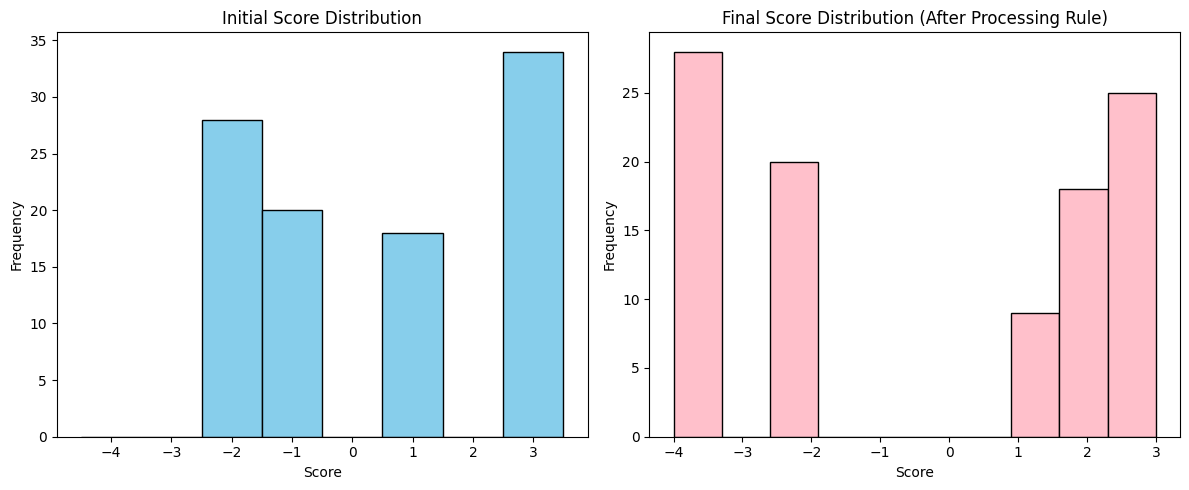

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n_draws = 100
cards = ['Ace','2','3','4','5','6','7','8','9','10','Jack','Queen','King']

# Step 1: Randomly select cards
draws = np.random.choice(cards, size=n_draws)

# Step 2: Map cards to initial score
score_map = {
    'Ace': -2, '2': -2, '3': -2,
    '4': -1, '5': -1, '6': -1,
    '7': 1, '8': 1, '9': 1,
    '10': 3, 'Jack': 3, 'Queen': 3, 'King': 3
}
initial_scores = np.array([score_map[card] for card in draws])

# Step 3: Apply processing rules
final_scores = []
for score in initial_scores:
    if score < 0:
        final_scores.append(score * 2)  # double penalty
    elif score == 1:
        bonus = np.random.choice([0, 1])  # 50% chance bonus
        final_scores.append(score + bonus)
    elif score == 3:
        penalty = np.random.choice([0, 1], p=[0.7, 0.3])  # 30% chance subtract 1
        final_scores.append(score - penalty)
final_scores = np.array(final_scores)

# Step 4: Stats
print("Initial Scores: Mean =", np.mean(initial_scores), ", Std Dev =", np.std(initial_scores))
print("Final Scores: Mean =", np.mean(final_scores), ", Std Dev =", np.std(final_scores))

# Step 5: Plot distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(initial_scores, bins=[-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5], color='skyblue', edgecolor='black')
plt.title("Initial Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(final_scores, bins=10,color='pink', edgecolor='black')
plt.title("Final Score Distribution (After Processing Rule)")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Example 2: Normal Contionuous distribution

A factory produces screws with lengths that are normally distributed, with a mean of 15 mm and standard deviation of 3 mm. This is a continuous random variable, as lengths can take any value within a range. Processing rules are applied as such:

Length < 12 mm → discard 

12 ≤ length ≤ 18 mm → accept as it is

Length > 18 mm → cut down to 18 mm

Raw Lengths: Mean = 15.010625734521964 , Std Dev = 2.981576536204378
Final Lengths: Mean = 13.148666665597032 , Std Dev = 5.895759602707886


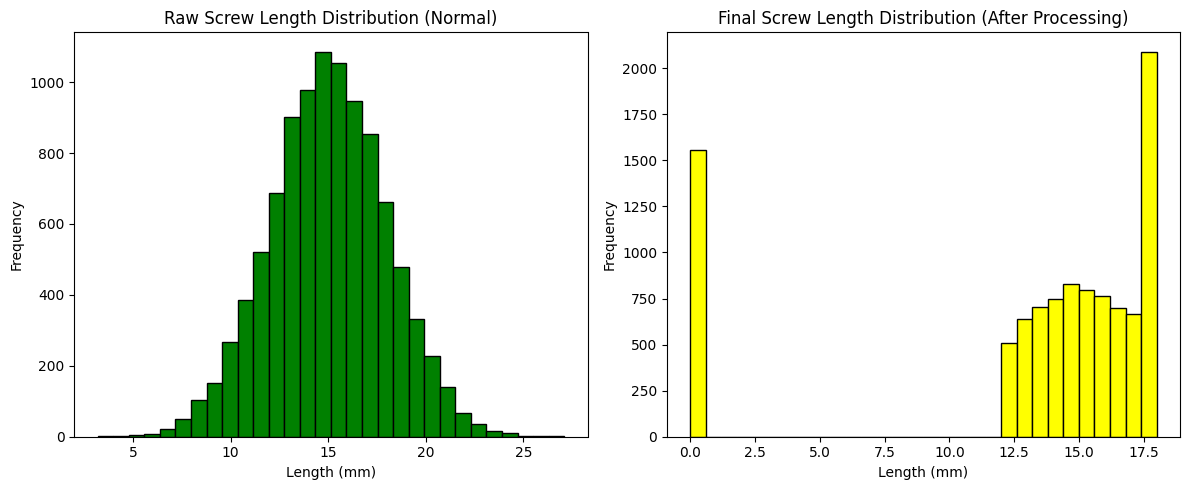

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_screws = 10000
mean_length = 15
std_length = 3

# Step 1: Raw screw lengths (Normal distribution)
raw_lengths = np.random.normal(mean_length, std_length, n_screws)

# Step 2: Apply processing rules
final_lengths = []
for length in raw_lengths:
    if length < 12:
        final_lengths.append(0)  # discard
    elif length > 18:
        final_lengths.append(18)  # cut down
    else:
        final_lengths.append(length)
final_lengths = np.array(final_lengths)

# Step 3: Stats
print("Raw Lengths: Mean =", np.mean(raw_lengths), ", Std Dev =", np.std(raw_lengths))
print("Final Lengths: Mean =", np.mean(final_lengths), ", Std Dev =", np.std(final_lengths))

# Step 4: Plot distributions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(raw_lengths, bins=30, color='green', edgecolor='black')
plt.title("Raw Screw Length Distribution (Normal)")
plt.xlabel("Length (mm)")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(final_lengths, bins=30, color='yellow',edgecolor='black')
plt.title("Final Screw Length Distribution (After Processing)")
plt.xlabel("Length (mm)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [39]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

#### Visualizing by grouping gender

In [40]:
#hue is used to give different colours for each gender
#alpha is used for increasing or decreasing the opaticy, 0= transparent and 1=opaque
"""import seaborn as sns
sns.scatterplot(data=data, x="Height", y="Weight", hue="Gender", alpha=0.8)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Height vs Weight by Gender")
plt.show()
plt.show()"""

'import seaborn as sns\nsns.scatterplot(data=data, x="Height", y="Weight", hue="Gender", alpha=0.8)\nplt.xlabel("Height (inches)")\nplt.ylabel("Weight (pounds)")\nplt.title("Height vs Weight by Gender")\nplt.show()\nplt.show()'

### Alternatively getting the avg weight & height based on gender and plotting the graph


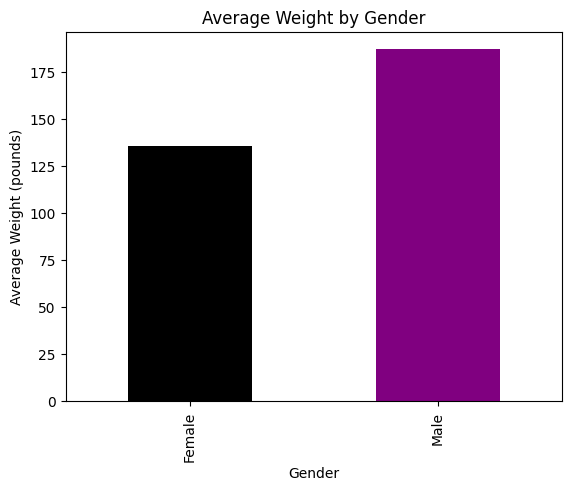

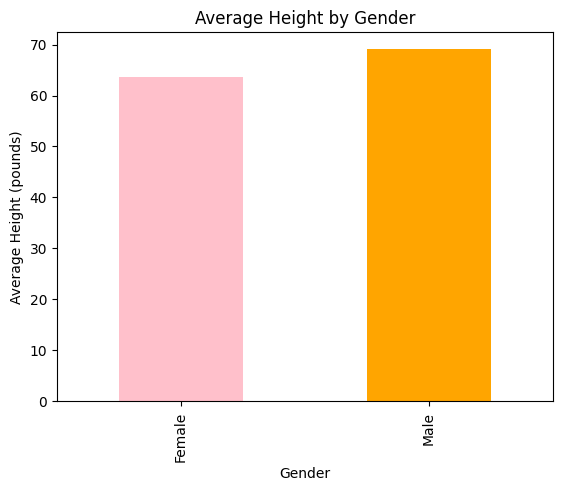

In [41]:

avg_weight = data.groupby("Gender")["Weight"].mean()
avg_weight.plot(kind="bar", color=["black", "purple"])
plt.ylabel("Average Weight (pounds)")
plt.title("Average Weight by Gender")
plt.show()

avg_height = data.groupby("Gender")["Height"].mean()
avg_height.plot(kind="bar", color=["pink", "orange"])
plt.ylabel("Average Height (pounds)")
plt.title("Average Height by Gender")
plt.show()

#### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [42]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [43]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=20) # !!!DO NOT CHANGE THE NAME OF THE SPLITS!!!

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [44]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
# !!!DO NOT CHANGE THE NAME OF THE MODEL!!!

In [45]:
model.fit(X_train, y_train) 

,priors,None
,var_smoothing,1e-09


In [46]:
# Making predictions
pred = model.predict(X_test)

### Test the algorithm
Using the test data

In [47]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
acc

0.8924242424242425

In [48]:
from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted Positive', 'Predicted Negative'],
        index=['Actual Positive', 'Actual Negative'])
matrix

,Predicted Positive,Predicted Negative
Actual Positive,1453,178
Actual Negative,177,1492


### Plot the random samples

In [49]:
################################
random_heights = np.random.uniform(55, 80, 300)
random_weights = np.random.uniform(90, 250, 300)
samples = np.column_stack((random_heights, random_weights))

# Predict classes for these samples
preds = model.predict(samples)


/Users/bhagyas/Downloads/ML lab/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


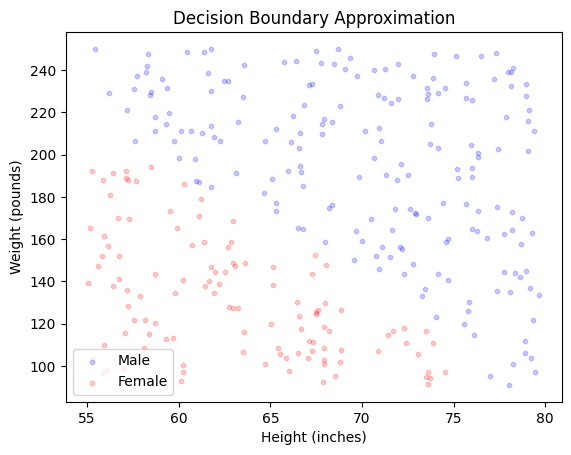

In [50]:
plt.scatter(samples[preds == "Male", 0], samples[preds == "Male", 1],
            c="blue", alpha=0.2, s=10, label="Male")
plt.scatter(samples[preds == "Female", 0], samples[preds == "Female", 1],
            c="red", alpha=0.2, s=10, label="Female")

plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.title("Decision Boundary Approximation")
plt.legend()
plt.show()